In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [5]:
import tensorflow as tf
from tensorflow import keras as kr
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
import seaborn as sns

In [6]:
print(tf.__version__)

1.13.1


In [7]:
fashion_mnist = kr.datasets.fashion_mnist

In [14]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [16]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data 

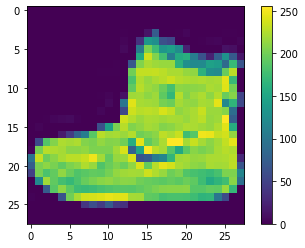

In [31]:
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [32]:
x_train = x_train / 255.0
x_test = x_test / 255.0

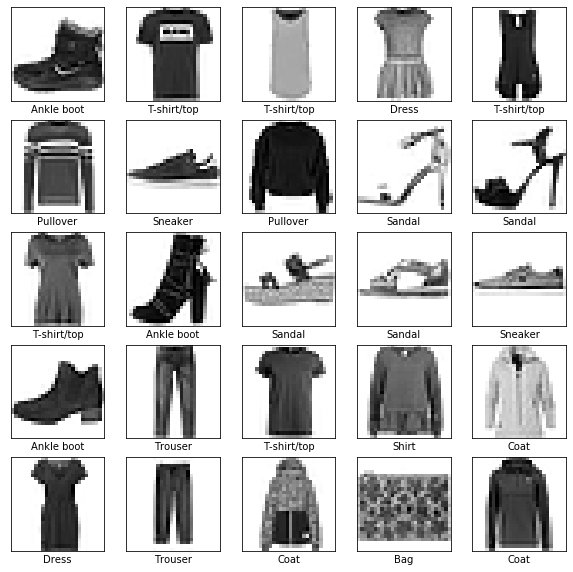

In [34]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Model 

In [36]:
model = kr.Sequential([kr.layers.Flatten(input_shape=(28,28)),
                      kr.layers.Dense(128,activation='relu'),
                      kr.layers.Dense(10,activation='softmax')
                      ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.4947 - acc: 0.8271
Epoch 2/10
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3742 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.3391 - acc: 0.8755
Epoch 4/10
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3153 - acc: 0.8843
Epoch 5/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2970 - acc: 0.8896
Epoch 6/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2802 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.2687 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 10s 166us/sample - loss: 0.2587 - acc: 0.9036
Epoch 9/10
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2483 - acc:

In [37]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 120us/sample - loss: 0.3324 - acc: 0.8826


In [40]:
predictions = model.predict(x_test)

In [46]:
np.argmax(predictions[0])

9

In [48]:
y_test[0]

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

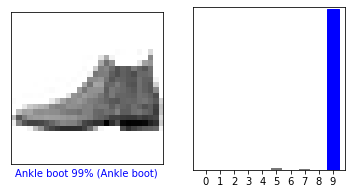

In [53]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

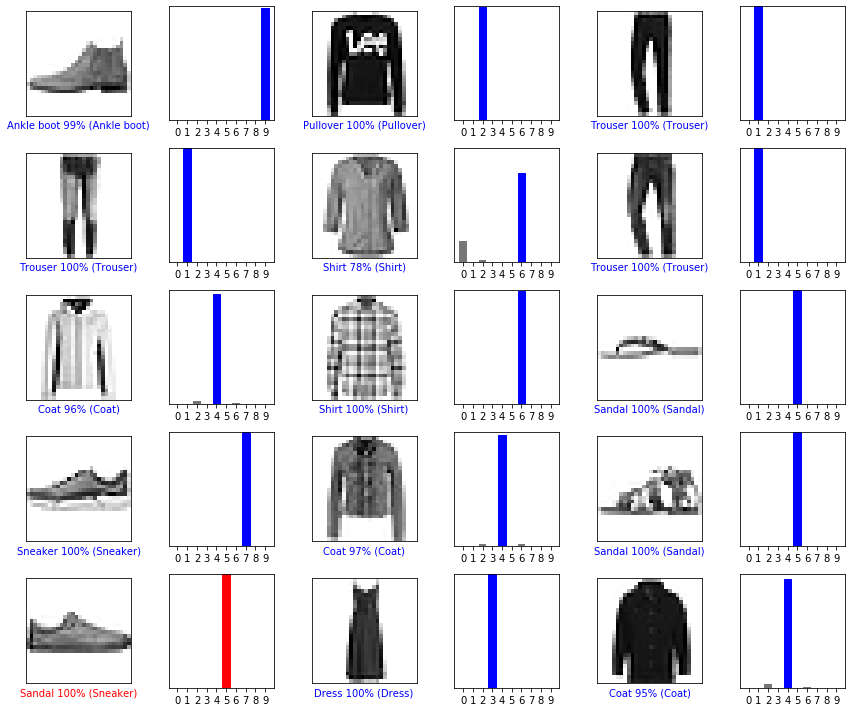

In [54]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()